In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data1 = data.copy(deep=True)

In [4]:
data1

,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920,1080,Windows 11 OS,1
1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920,1080,Windows 11 OS,1
2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920,1080,Windows 11 OS,1
3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240,1400,Windows 11 OS,1
4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560,1600,Mac OS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,Asus,Vivobook 15X 2023 K3504VAB-NJ321WS Laptop,44990,69.323529,13th Gen ‎Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Integrated Intel UHD Graphics,15.6,1920,1080,Windows 11 OS,1
889,Asus,TUF A15 FA577RM-HQ032WS Laptop,110000,71.000000,6th Gen AMD Ryzen 7 6800H,"Octa Core, 16 Threads",16GB,DDR,1TB,SSD,6GB NVIDIA GeForce RTX 3060,15.6,2560,1440,Windows 11 OS,1
890,Asus,ROG Zephyrus G14 2023 GA402XV-N2034WS Gaming L...,189990,89.000000,7th Gen AMD Ryzen 9 7940HS,"Octa Core, 16 Threads",32GB,DDR5,1TB,SSD,8GB NVIDIA GeForce RTX 4060,14.0,2560,1600,Windows 11 OS,1
891,Asus,TUF Gaming F15 2023 FX507VU-LP083WS Gaming Laptop,129990,73.000000,13th Gen Intel Core i7 13700H,"14 Cores (6P + 8E), 20 Threads",16GB,DDR4,512GB,SSD,6GB NVIDIA GeForce RTX 4050,15.6,1920,1080,Windows 11 OS,1


In [5]:
corrviz = data1.select_dtypes(include=['int','float'])

<AxesSubplot:>

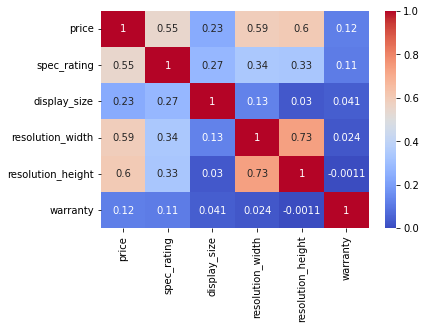

In [6]:
sns.heatmap(data=corrviz.corr(),annot=True,cmap='coolwarm')

In [7]:
data1.isnull().sum()

brand                0
name                 0
price                0
spec_rating          0
processor            0
CPU                  0
Ram                  0
Ram_type             0
ROM                  0
ROM_type             0
GPU                  0
display_size         0
resolution_width     0
resolution_height    0
OS                   0
warranty             0
dtype: int64

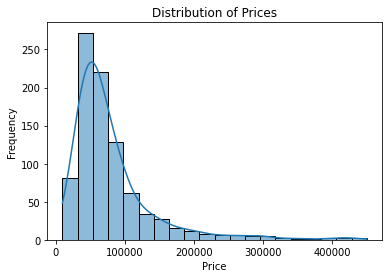

In [8]:
sns.histplot(data['price'], bins=20, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

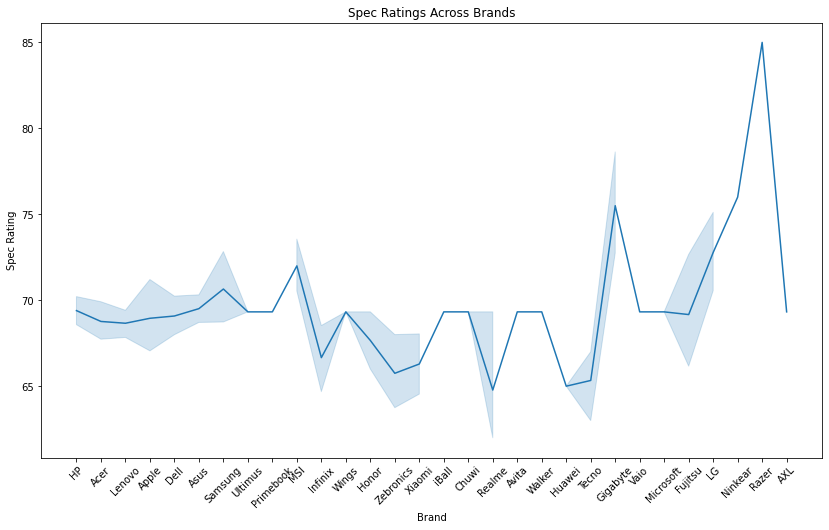

In [9]:
plt.figure(figsize=(14,8))
sns.lineplot(x='brand', y='spec_rating', data=data)
plt.title('Spec Ratings Across Brands')
plt.xlabel('Brand')
plt.ylabel('Spec Rating')
plt.xticks(rotation=45)
plt.show()

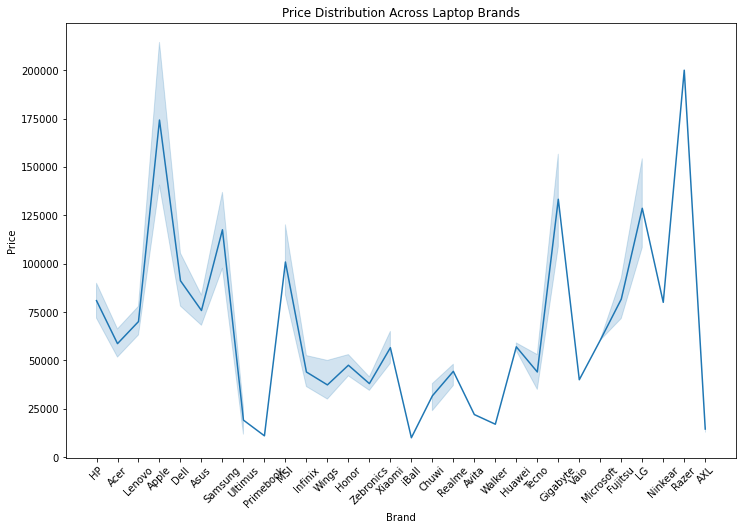

In [10]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='brand', y='price', data=data1)
plt.xticks(rotation=45)
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Price Distribution Across Laptop Brands')
plt.show()

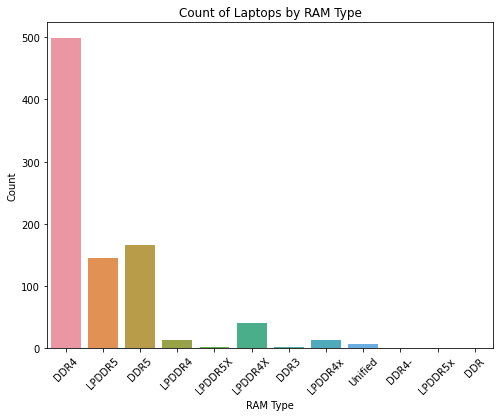

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Ram_type', data=data1)
plt.xlabel('RAM Type')
plt.ylabel('Count')
plt.title('Count of Laptops by RAM Type')
plt.xticks(rotation=45)
plt.show()

In [12]:
def convert_tb_to_gb(storage):
    if 'TB' in storage:
        return int(storage.replace('TB', '')) * 1024
    else:
        return int(storage.replace('GB', ''))

# Apply the function to the 'ROM' column
data1['ROM'] = data1['ROM'].apply(convert_tb_to_gb)

In [13]:
data1['Ram'] = data1['Ram'].str.replace('GB', '').astype(int)

In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              893 non-null    object 
 1   name               893 non-null    object 
 2   price              893 non-null    int64  
 3   spec_rating        893 non-null    float64
 4   processor          893 non-null    object 
 5   CPU                893 non-null    object 
 6   Ram                893 non-null    int32  
 7   Ram_type           893 non-null    object 
 8   ROM                893 non-null    int64  
 9   ROM_type           893 non-null    object 
 10  GPU                893 non-null    object 
 11  display_size       893 non-null    float64
 12  resolution_width   893 non-null    int64  
 13  resolution_height  893 non-null    int64  
 14  OS                 893 non-null    object 
 15  warranty           893 non-null    int64  
dtypes: float64(2), int32(1), i

In [15]:
data1 = data1.drop(columns=['name'])

In [16]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns = ['brand', 'processor', 'CPU', 'Ram_type', 'ROM_type', 'GPU', 'OS']
from sklearn.preprocessing import LabelEncoder


# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
for column in categorical_columns:
    data1[column] = label_encoder.fit_transform(data1[column])

In [17]:
data1

,brand,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,9,49900,73.000000,105,19,8,2,512,1,19,15.6,1920,1080,12,1
1,9,39900,60.000000,34,18,8,2,512,1,126,15.6,1920,1080,12,1
2,1,26990,69.323529,15,17,8,2,512,1,123,14.0,1920,1080,12,1
3,14,59729,66.000000,39,6,16,8,512,1,111,14.0,2240,1400,12,1
4,2,69990,69.323529,160,21,8,2,256,1,91,13.3,2560,1600,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,3,44990,69.323529,80,18,8,2,512,1,95,15.6,1920,1080,12,1
889,3,110000,71.000000,122,24,16,0,1024,1,52,15.6,2560,1440,11,1
890,3,189990,89.000000,143,24,32,4,1024,1,63,14.0,2560,1600,12,1
891,3,129990,73.000000,73,8,16,2,512,1,53,15.6,1920,1080,12,1


In [18]:
x = data1.drop('price',axis=1)
y = data1['price']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 44)

In [21]:
model.fit(x_train,y_train)

RandomForestRegressor(random_state=44)

In [22]:
pred = model.predict(x_test)

In [23]:
from sklearn.metrics import r2_score, mean_absolute_error
r2 = r2_score(y_test, pred)
print(f'R-squared (R2) Score: {r2*100} // {r2}')

R-squared (R2) Score: 83.76921545499295 // 0.8376921545499294


In [24]:
import pickle
with open("model.pkl", 'wb') as file:
    pickle.dump(model, file)

In [25]:
with open('encoder.pkl', 'wb') as file:
    pickle.dump(data1,file)

In [26]:
# brand             
# name              
# price              
# spec_rating      
# processor         
# CPU               
# Ram                
# Ram_type          
# ROM                
# ROM_type          
# GPU               
# display_size     
# resolution_width  
# resolution_height  
# OS                
# warranty 